In [3]:
import requests
import pandas as pd
import yaml
import duckdb

In [5]:
DB_PATH = 'weather.duckdb'
TABLE_NAME = 'observations'


In [6]:
var = 'tempf'
con = duckdb.connect(DB_PATH)
df = con.sql(f"""select date AT TIME ZONE 'UTC' AT TIME ZONE 'America/Chicago' AS cst_time,
              {var} from observations 
              where date >= CURRENT_DATE - INTERVAL 7 DAY""").df()
con.close()
df

,cst_time,tempf
0,2025-08-02 19:22:00,85.1
1,2025-08-02 19:23:00,85.1
2,2025-08-02 19:25:00,84.9
3,2025-08-02 19:26:00,84.9
4,2025-08-02 19:27:00,84.9
...,...,...
1180,2025-08-04 10:37:00,75.0
1181,2025-08-04 10:38:00,74.8
1182,2025-08-04 10:39:00,74.5
1183,2025-08-04 10:40:00,74.1


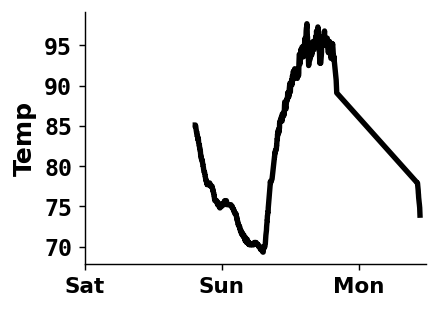

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df['mov'] = df[var].rolling(1).mean()
dpi = 129
figsize = (3.5, 2.5)

fig, ax = plt.subplots(figsize=figsize, dpi=dpi)


fig.patch.set_alpha(0.0)       # Transparent figure background
ax.set_facecolor('none')       # Transparent plot background

unique_days = df['cst_time'].dt.normalize().drop_duplicates()
plt.xticks(unique_days, unique_days.dt.strftime('%a'), rotation=0, fontsize=12, fontweight='bold')
plt.xlim(unique_days.min(),df['cst_time'].max()+ pd.Timedelta(hours=1))
plt.yticks(rotation=0, fontsize=13, fontweight='bold', fontname='DejaVu Sans Mono')
ax.set_ylabel('Temp', fontsize=14, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.plot(df['cst_time'], df['mov'], color='black', linewidth=3)
#ax.plot(df['cst_time'], df[var])


plt.tight_layout()
plt.savefig("plots/temperature.png", dpi=129, bbox_inches='tight')

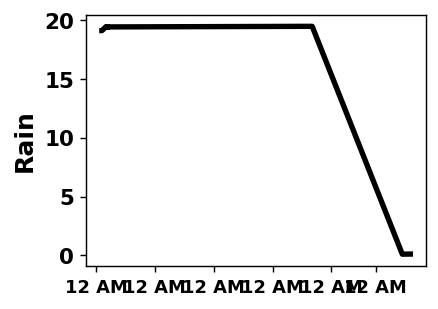

In [ ]:
import matplotlib.pyplot as plt


df['mov'] = df[var].rolling(1).mean()
width, height = 400, 400
dpi = 129
figsize = (3.5, 2.5)

fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

fig.patch.set_alpha(0.0)       # Transparent figure background
ax.set_facecolor('none')       # Transparent plot background

plt.xticks(rotation=0, fontsize=10, fontweight='bold')
plt.yticks(rotation=0, fontsize=12, fontweight='bold')

ax.set_ylabel('Rain', fontsize=14, fontweight='bold')

ax.plot(df['cst_time'], df['mov'], color='black', linewidth=3)
#ax.plot(df['cst_time'], df[var])

myFmt = mdates.DateFormatter("%#I %p")  # 12-hour format with AM/PM
ax.xaxis.set_major_formatter(myFmt)  # apply formatter to x-axis

plt.tight_layout()
plt.savefig("plots/rain.png", dpi=129, bbox_inches='tight')
plt.show()


In [15]:
df.groupby

<bound method DataFrame.groupby of                cst_time  monthlyrainin     mov
0   2025-07-27 08:43:00         19.492  19.492
1   2025-07-27 08:56:00         19.492  19.492
2   2025-07-27 09:05:00         19.492  19.492
3   2025-07-27 16:34:00         19.492  19.492
4   2025-08-02 19:22:00          0.110   0.110
..                  ...            ...     ...
663 2025-08-03 08:05:00          0.110   0.110
664 2025-08-03 08:07:00          0.110   0.110
665 2025-08-03 08:08:00          0.110   0.110
666 2025-08-03 08:31:00          0.118   0.118
667 2025-08-03 08:32:00          0.118   0.118

[668 rows x 3 columns]>

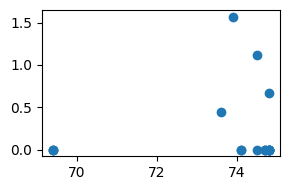

In [13]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from io import BytesIO

def plot_to_bw_pil():
	buf = BytesIO()
	width_px, height_px = 300, 200
	dpi = 100
	fig = plt.figure(figsize=(width_px / dpi, height_px / dpi), dpi=dpi)

	plt.scatter(df['tempf'], df['windspeedmph'])
	plt.tight_layout()
	plt.savefig(buf, format='png', bbox_inches='tight', dpi=100)
	buf.seek(0)
	img = Image.open(buf).convert("L")  # grayscale
	bw = img.point(lambda x: 0 if x < 128 else 255, '1')  # threshold to B/W
	return bw

# Create base image
W, H = (800, 480)
image = Image.new("1", (W, H), 255)
draw = ImageDraw.Draw(image)

# Create plot image
plot_img = plot_to_bw_pil()
plot_img = plot_img.resize((300, 200))

# Paste bottom right
image.paste(plot_img, (W - plot_img.width, H - plot_img.height))

image.show()
